# Lesson Outline
- Brief Intro to Reinforcement Learning
- What is Gymnasium
- Frozen Lake Challenge
- Q Learning
- The Exploration and Exploitation Dilemma
- Extra (Deep Reinforcement Learning)



| ![image](images/intro_image.png "Intro_to_RL") |
|:---:|


In [ ]:
# https://gymnasium.farama.org/

In [4]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import time

# The Frozen Lake Challenge 


<div style="text-align: center;">
  <img src="images/frozen_lake.png" alt="Frozen Lake" title="Frozen Lake" width="500" height="auto" />
</div>



In [7]:
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False,render_mode='human')

In [6]:
env.reset()
for step in range(24):
    
    env.render()
    action = env.action_space.sample() # cart accelerates to the right
    observation,reward,terminated,truncated,info = env.step(action)
    time.sleep(0.5)
    if terminated or truncated:
        env.reset()
env.close()


In [20]:
action_size = env.action_space.n
state_size = env.observation_space.n
q_table = np.zeros([state_size,action_size])

# Q Table

<div style="text-align: center;">
  <img src="images/Q_table.png" alt="Frozen Lake" title="Frozen Lake" width="500" height="auto" />
</div>



# Updating Q Table

$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha [r_{t+1} + \gamma \max_{a} Q(s_{t+1}, a) - Q(s_t, a_t)]
$$


$$
Q_{new} \leftarrow Q_{current} +\alpha( error)
$$

$$
Q_{new} \leftarrow Q_{current} +\alpha[Q_{target}-Q_{current}]
$$

$$
{Q_{\text{target}}(s_t, a_t) = r_t + \gamma \sum_{k=1}^{\infty} \gamma^{k-1} r_{t+k}}
$$


$$
Q_{\text{target}}(s_t, a_t) = r_t + \gamma * r_{t+1} + \gamma^2 * r_{t+2} + \gamma^3 * r_{t+3} + \cdots
$$


$$
Q_{\text{target}}(s_t, a_t) = r_{t+1} + \gamma \max_{a} Q(s_{t+1}, a)
$$


In [9]:

ALPHA=0.8
GAMMA = 0.9


In [10]:
def compute_next_q_value(old_q_value,reward,next_optimal_q_value):
    
    return old_q_value + ALPHA * (reward + GAMMA*next_optimal_q_value - old_q_value)

# The Exploration Exploitation Dilema

$$
a_t =
\begin{cases}
\text{argmax}_{a} Q(s_t, a), & \text{with probability } 1 - \epsilon_t \\
\text{random action}, & \text{with probability } \epsilon_t
\end{cases}
$$

$$
\epsilon_t = \epsilon_{\text{min}} + (\epsilon_{\text{max}} - \epsilon_{\text{min}}) \cdot e^{-\text{decay rate} \cdot t}
$$


In [13]:
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.001
epoch = 20000

In [14]:

def epsilon_greedy_action_selection(epsilon,q_table,discrete_state):
    
    random_number = np.random.random()
    
    if random_number > epsilon:
        
        state_row = q_table[discrete_state,:]
        
        action = np.argmax(state_row)
        
    else:
        action = env.action_space.sample()
    return action

$$
\epsilon_t = \epsilon_{\text{min}} + (\epsilon_{\text{max}} - \epsilon_{\text{min}}) \cdot e^{-\text{decay rate} \cdot t}
$$

In [22]:
min_epsilon = 0.01
max_epsilon = 1.0
decay_rate = 0.005

In [23]:
def reduce_epsilon(epsilon,epoch):
    
    return min_epsilon + (max_epsilon-min_epsilon)*np.exp(-decay_rate * epoch)

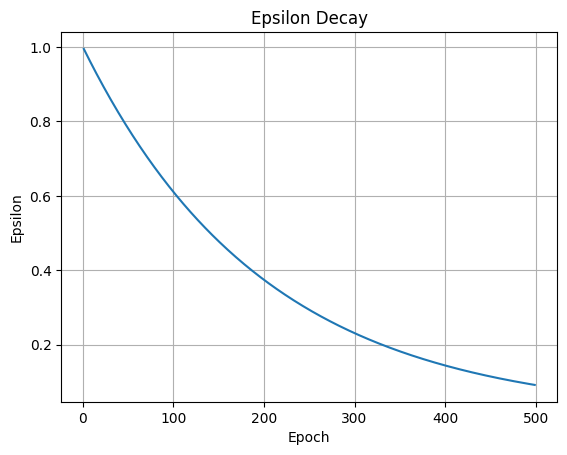

In [24]:

epochs = np.arange(1, 500)
epsilons = [reduce_epsilon(epsilon, epoch) for epoch in epochs]

plt.plot(epochs, epsilons)
plt.xlabel('Epoch')
plt.ylabel('Epsilon')
plt.title('Epsilon Decay')
plt.grid()
plt.show()



# Training the Agent 

In [25]:
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)

In [26]:
# implementation of the q_value
env.reset()
rewards = []


log_interval = 1000
#######################
#fig = plt.figure()
#ax = fig.add_subplot(111)
#plt.ion()
#fig.canvas.draw()
epoch_plot_tracker = []
total_reward_plot_tracker = []

#############################
for episode in range (epoch):
    
    state,info = env.reset()
    done = False 
    total_rewards = 0
    
    while not done:
        
        # Action
        action = epsilon_greedy_action_selection(epsilon,q_table,state)
        
        # state,reward ... env.step()
        new_state,reward,done,info,_ = env.step(action)
 
        # OLD (current) Q VALUE 
        #print(new_state)
        #print(action)
        old_q_value = q_table[state,action]
        # Get next optimal Q value
        
        next_optimal_q_value = np.max(q_table[new_state,:])
        # compute the next q value
        
        next_q = compute_next_q_value(old_q_value,reward,next_optimal_q_value)
        # update the table 
        q_table[state,action] = next_q
        # track rewards
        
        total_rewards = total_rewards + reward
        
        state = new_state
    # Agent finished a round of the game 
    episode += 1
    
    epsilon = reduce_epsilon(epsilon,episode)
    
    rewards.append(total_rewards)
    total_reward_plot_tracker.append(np.sum(rewards))
    epoch_plot_tracker.append(episode)
    #########################################
    if episode % log_interval == 0:
      
        
        print(f'rewards at episode {episode}, is {np.sum(rewards)}')
        total_reward_plot_tracker.append(np.sum(rewards))
        epoch_plot_tracker.append(episode)
        #print(np.sum(rewards))
    ########################################
        
env.close()  
np.save('q_table.npy', q_table)

rewards at episode 1000, is 664.0
rewards at episode 2000, is 1655.0
rewards at episode 3000, is 2641.0
rewards at episode 4000, is 3627.0
rewards at episode 5000, is 4619.0
rewards at episode 6000, is 5610.0
rewards at episode 7000, is 6601.0
rewards at episode 8000, is 7593.0
rewards at episode 9000, is 8587.0
rewards at episode 10000, is 9572.0
rewards at episode 11000, is 10562.0
rewards at episode 12000, is 11550.0
rewards at episode 13000, is 12536.0
rewards at episode 14000, is 13526.0
rewards at episode 15000, is 14514.0
rewards at episode 16000, is 15506.0
rewards at episode 17000, is 16495.0
rewards at episode 18000, is 17490.0
rewards at episode 19000, is 18483.0
rewards at episode 20000, is 19469.0


# Visualizing trained agent 

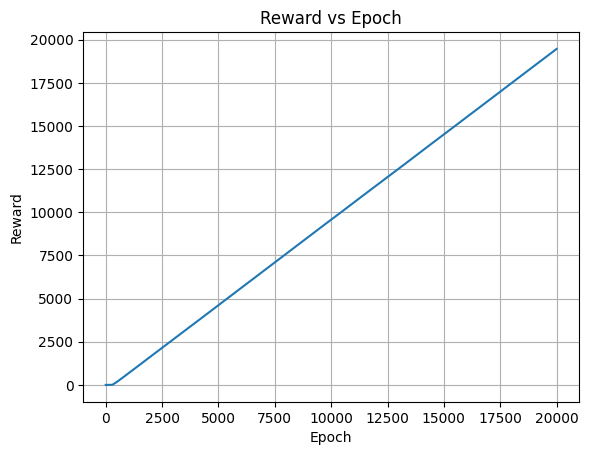

In [27]:
plt.plot(epoch_plot_tracker, total_reward_plot_tracker)
plt.xlabel('Epoch')
plt.ylabel('Reward')
plt.title('Reward vs Epoch')
plt.grid()
plt.show()

In [28]:
# Reinitialize the environment 
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False,render_mode='human')

In [29]:
q_table = np.load('q_table_saved_2.npy')
state,info = env.reset()
reward=0
round=0
for steps in range(30):
    env.render()
    action = np.argmax(q_table[state,:])
    state,reward,truncated,terminated,info = env.step(action)
    
    time.sleep(1)    
    if truncated or terminated:
        round += 1
        print(f"reward at round: {round} is = {reward}")
        state,info = env.reset()
env.close()

reward at round: 1 is = 1.0
reward at round: 2 is = 1.0
reward at round: 3 is = 1.0
reward at round: 4 is = 1.0
reward at round: 5 is = 1.0


# Thank You for attending todays CSM Socials 